# Gathering Data

In [43]:
# Import and download everything required for the code

import requests
import nltk
import matplotlib.pyplot as plt
import re
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline
from bs4 import BeautifulSoup as soup
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
# Function for getting words
def collect_news(url, tag):
    html = requests.get(url)
    bsobj = soup(html.content,'lxml')

    # Initialize empty list for headlines and words
    headlines = []
    words = []
    
    for headline in bsobj.findAll(tag):
        if len(headline.text) >= 5:
            headlines.append(headline.text)
            
    # Filter into list with words
    words = [word for headline in headlines for word in headline.split(" ")]
    
    return words

In [33]:
# Here are the sites we want to search plus the tag for the headline
sites_tags = [["https://edition.cnn.com/world", "span"], ["https://abcnews.go.com/", "span"], ["https://www.bbc.com/news", "h3"]]

In [66]:
# Looping through the sites and adding words to a list
words = []
for i in sites_tags:
    words.append(collect_news(i[0], i[1]))
    
# Flatten list
words = [x for row in words for x in row]

In [84]:
# Remove stop words
stop_words = stopwords.words('english')

def remove_stop_words(tokenized_text, stop_words):
    clean_text = []
  
    for token in tokenized_text:  
        if token not in stop_words and token != "":  
            clean_text.append(token)  
    
    return clean_text

clean_words = remove_stop_words(words, stop_words)

# Still contains punctuation etc.
for i in range(len(words)):
    words[i] = re.sub("[^A-Za-z0-9]", "", words[i])
    words[i] = words[i].lower()

In [86]:
# Lemmatization
lem = WordNetLemmatizer()
lemmatized_words = [lem.lemmatize(word) for word in clean_words]

# Analysis

In [87]:
fdist_lemmatized = FreqDist(lemmatized_words)

print(len(fdist_lemmatized.most_common()))

fdist_lemmatized.most_common()

914


[('world', 14),
 ('video', 13),
 ('cnn', 12),
 ('new', 12),
 ('libya', 11),
 ('lee', 11),
 ('u', 10),
 ('american', 10),
 ('hurricane', 10),
 ('say', 9),
 ('iran', 9),
 ('news', 9),
 ('account', 8),
 ('one', 7),
 ('help', 7),
 ('flood', 6),
 ('un', 6),
 ('jet', 6),
 ('flooding', 6),
 ('day', 6),
 ('death', 6),
 ('freed', 6),
 ('england', 6),
 ('house', 6),
 ('africa', 5),
 ('first', 5),
 ('china', 5),
 ('war', 5),
 ('ukraine', 5),
 ('year', 5),
 ('look', 5),
 ('left', 5),
 ('russia', 5),
 ('abc', 5),
 ('biden', 5),
 ('log', 4),
 ('killed', 4),
 ('week', 4),
 ('meet', 4),
 ('derna', 4),
 ('take', 4),
 ('mahsa', 4),
 ('aminis', 4),
 ('inside', 4),
 ('gallery', 4),
 ('son', 4),
 ('kim', 4),
 ('barry', 4),
 ('move', 4),
 ('live', 4),
 ('show', 4),
 ('latest', 4),
 ('cup', 4),
 ('republican', 4),
 ('leader', 3),
 ('20', 3),
 ('south', 3),
 ('land', 3),
 ('official', 3),
 ('military', 3),
 ('chinese', 3),
 ('body', 3),
 ('share', 3),
 ('australia', 3),
 ('woman', 3),
 ('return', 3),
 ('top',

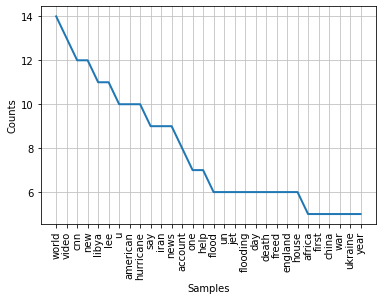

In [88]:
fdist_lemmatized.plot(30, cumulative=False)
plt.show()